# Distributions


Text(0.5, 0, 'Number of Occurances')

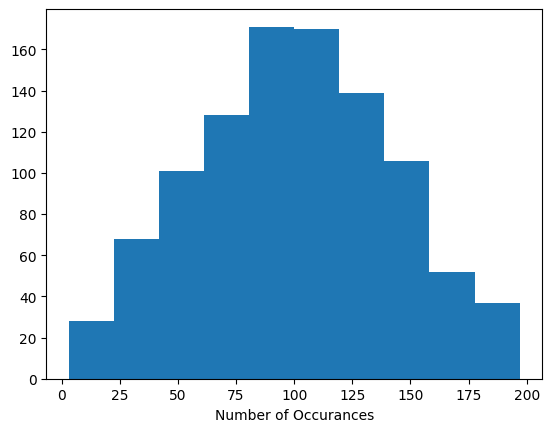

In [2]:
import random
import pylab
vals = []
for i in range(1000):
    num1 = random.choice(range(0,101))
    num2 = random.choice(range(0,101))
    vals.append(num1+num2)
pylab.hist(vals, bins = 10)
pylab.xlabel('Number of Occurances')

In [5]:
def variance(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot  += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """Assumes that X is a list of numbers.
    Returns the standard deviation of X"""
    return variance(X)**0.5

In [6]:


def flip(numFlips):
    """Assumes numFlips a positive int"""
    heads = 0 
    for i in  range(numFlips):
        if random.choice(('H','T')) == 'H':
            heads += 1
    return heads/float(numFlips)

def flipSim(numFlipsPerTrial, numTrials):
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    sd = stdDev(fracHeads)
    return (fracHeads, mean, sd)

def labelPlot(numFlips, numTrials, mean, sd):
    pylab.title(str(numTrials) + ' trials of ' + str(numFlips) + ' flips each')
    pylab.xlabel('Fraction of Heads')
    pylab.ylabel('Number of Trials')
    pylab.annotate('Mean = ' + str(round(mean, 4))\
        + '\nSD = ' + str(round(sd, 4)), size = 'x-large', xycoords= 'axes fraction', xy = (0.67, 0.5))
    
def makePlots(numFlips1, numFlips2, numTrials):
    val1, mean1, sd1 = flipSim(numFlips1, numTrials)
    pylab.hist(val1, bins=20)
    xmin, xmax = pylab.xlim()
    labelPlot(numFlips1, numTrials, mean1, sd1)
    pylab.figure()
    val2, mean2, sd2 = flipSim(numFlips2, numTrials)
    pylab.hist(val2, bins=20)
    pylab.xlim(xmin, xmax)
    labelPlot(numFlips2, numTrials, mean2, sd2)

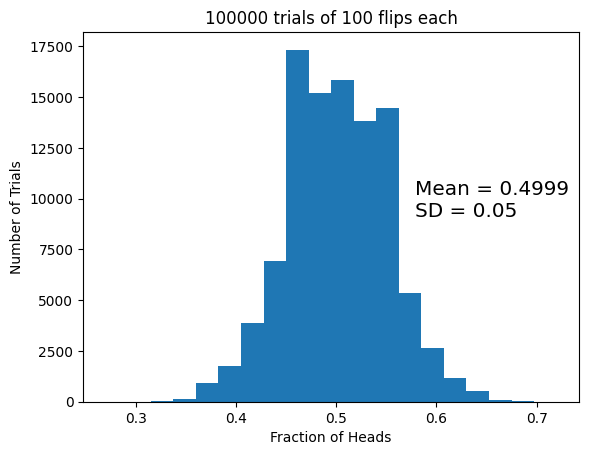

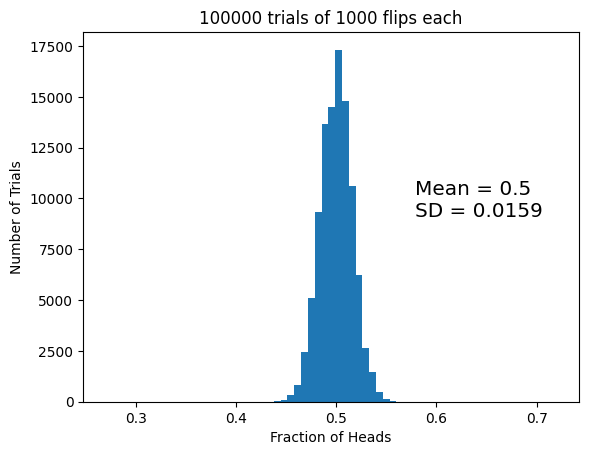

In [7]:
makePlots(100,1000,100000)

# Integration

In [8]:
import scipy 

print(scipy.integrate.quad(abs, 0,5)[0])

12.5


In [11]:
import scipy.integrate

def gaussian(x, mu, sigma):
    factor1 = (1.0/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1*factor2

def checkEmpirical(numTrials):
    for t in range(numTrials):
        mu = random.randint(-10,10)
        sigma = random.randint(1,10)
        print('For mu =', mu, 'and sigma =', sigma)
        for numStd in (1,2,3):
            area = scipy.integrate.quad(gaussian, mu-numStd*sigma,
                                        mu + numStd*sigma,
                                        (mu, sigma))[0]
            print('   Fraction within', numStd, 'std =', round(area, 4))

In [12]:
checkEmpirical(3)

For mu = 3 and sigma = 6
   Fraction within 1 std = 0.6827
   Fraction within 2 std = 0.9545
   Fraction within 3 std = 0.9973
For mu = -3 and sigma = 4
   Fraction within 1 std = 0.6827
   Fraction within 2 std = 0.9545
   Fraction within 3 std = 0.9973
For mu = -6 and sigma = 3
   Fraction within 1 std = 0.6827
   Fraction within 2 std = 0.9545
   Fraction within 3 std = 0.9973


In [14]:
import scipy 

print(scipy.integrate.quad(gaussian, -2,2,(0,1))[0])

0.9544997361036417


In [15]:
def showErrorBars(minExp, maxExp, numTrials):
    """Assumes minExp and maxExp positive ints; minExp < maxExp
    numTrials a positive integer
    Plots mean fraction of heads with error bars"""
    means, sds, xVals = [],[],[]
    for exp in range(minExp, maxExp + 1):
        xVals.append(2**exp)
        fracHeads, mean, sd = flipSim(2**exp, numTrials)
        means.append(mean)
        sds.append(sd)
    pylab.errorbar(xVals, means, yerr=1.96*pylab.array(sds))
    pylab.semilogx()
    pylab.title('Mean Fraction of Heads ()' + str(numTrials) + ' trials)')
    pylab.xlabel('Number of flips per trial')
    pylab.ylabel('Fraction of heads & 95% confidence')

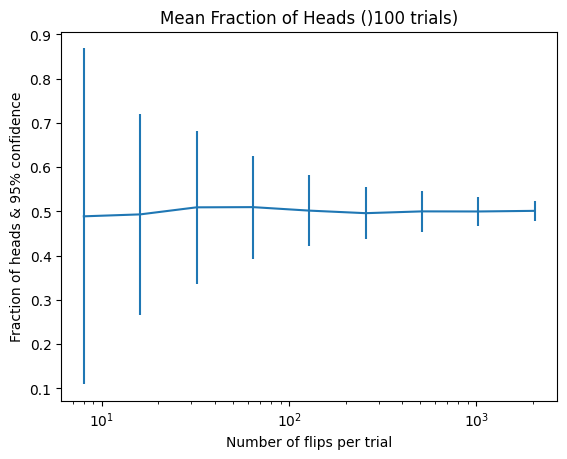

In [25]:
showErrorBars(3,11,100)

# Exponential Distribution  

In [26]:
def clear(n, p, steps):
    """assumes n & steps positive ints, p a float
    n: the inital number of molecules
    p: the probability of a moecule being cleared
    steps: the length of the simulation"""
    numRemaining = [n]
    for t in range(steps):
        numRemaining.append(n*((1-p)**t))
    pylab.plot(numRemaining)
    pylab.xlabel('Time')
    pylab.ylabel('Molecules Remaining')
    pylab.title('Clearance of Drug')

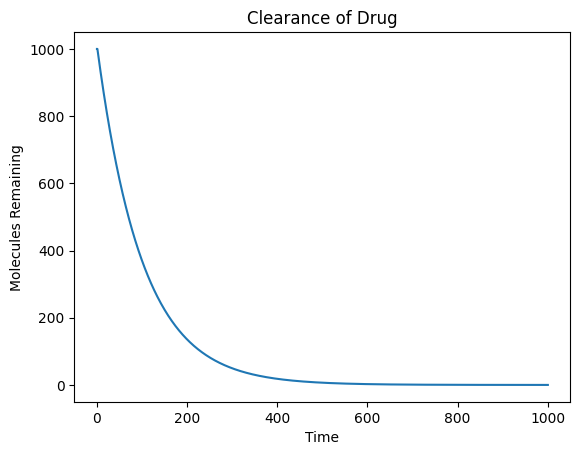

In [27]:
clear(1000, 0.01, 1000)

# Geometric Distribution
Testing the number of tries before success

Text(0.5, 1.0, 'Probability of Starting Each Try = 0.5')

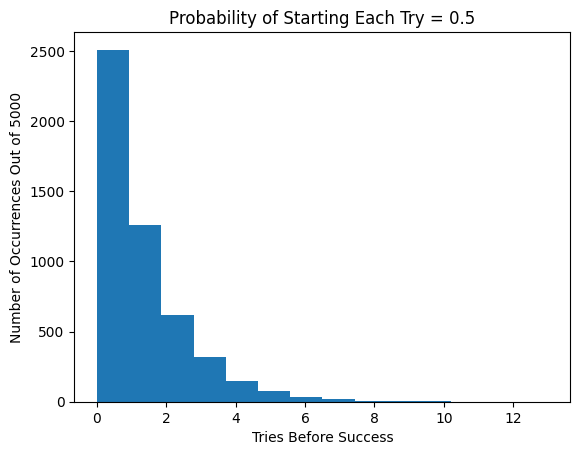

In [28]:
def successfulStarts(successProb, numTrials):
    """assumes successProb is a float representing probability of a 
    single attempt being successful. numTrials a positive int
    Returns a list of the number of attempts needed before a 
    success for each trial."""
    triesBeforeSuccess = []
    for t in range(numTrials):
        consecFailures = 0
        while random.random() > successProb:
            consecFailures += 1
        triesBeforeSuccess.append(consecFailures)
    return triesBeforeSuccess

probOfSuccess = 0.5
numTrials = 5000
distribution = successfulStarts(probOfSuccess, numTrials)
pylab.hist(distribution, bins=14)
pylab.xlabel('Tries Before Success')
pylab.ylabel('Number of Occurrences Out of ' + str(numTrials))
pylab.title('Probability of Starting Each Try = ' + str(probOfSuccess))